In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kernel(X,Y,sigma=1,l=1, squared=False):
    sqdist = np.zeros((X.size,Y.size))
    for i, x_i in enumerate(X):
        for j, x_j in enumerate(Y):
            sqdist[i][j] = abs(x_i-x_j)**2
    return sigma**2*np.exp(-0.5/l**2 * sqdist)

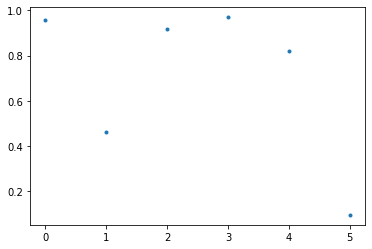

In [3]:
x = np.arange(0,6,1)
y = np.random.rand(6)
#y = np.array([0.698561, 0.233781, 0.532028, 0.525346, 0.10326])
plt.plot(x,y, '.')
x_fit = np.arange(0, 6, 0.1)

In [4]:
K = kernel(x, x)
K_s = kernel(x_fit, x_fit)
K_ss = kernel(x_fit,x)
K_inv = np.linalg.inv(K)
print(K.shape)
print(K_s.shape)
print(K_ss.shape)
print(K_inv.shape)
print(y.shape)
print(np.dot(K_ss, K_inv).shape)
mean = np.dot(np.dot(K_ss,K_inv), y)
cov = K_s - K_ss.dot(K_inv).dot(K_ss.T)

(6, 6)
(60, 60)
(60, 6)
(6, 6)
(6,)
(60, 6)


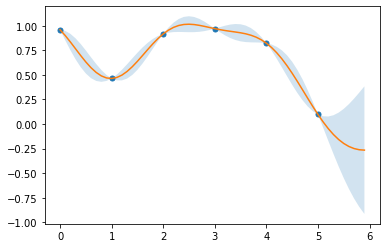

In [5]:
plt.plot(x, y, ".", markersize=10)
error = np.sqrt(np.diag(abs(cov)))
plt.fill_between(x_fit, mean + error, mean - error, alpha=0.2)
plt.plot(x_fit,mean)